# Analysing and comparing statistics of different generation methods

In [2]:
import sys
import os
from pathlib import Path
sys.path.append(os.path.join(os.getcwd(), '..', '..'))
import numpy as np
import torch
import matplotlib.pyplot as plt
import pickle as pkl
from tabulate import tabulate

### Correlation between quality criteria

In [3]:
import pandas as pd
import seaborn as sns

In [4]:
def iterate_with_key(arr, key):
    all = []
    for i in range(len(arr)):
        # leave out if nan
        val = arr[i][key]
        if not np.isnan(arr[i][key]):
            all.append(arr[i][key])
        else:
            continue

    return np.mean(all)

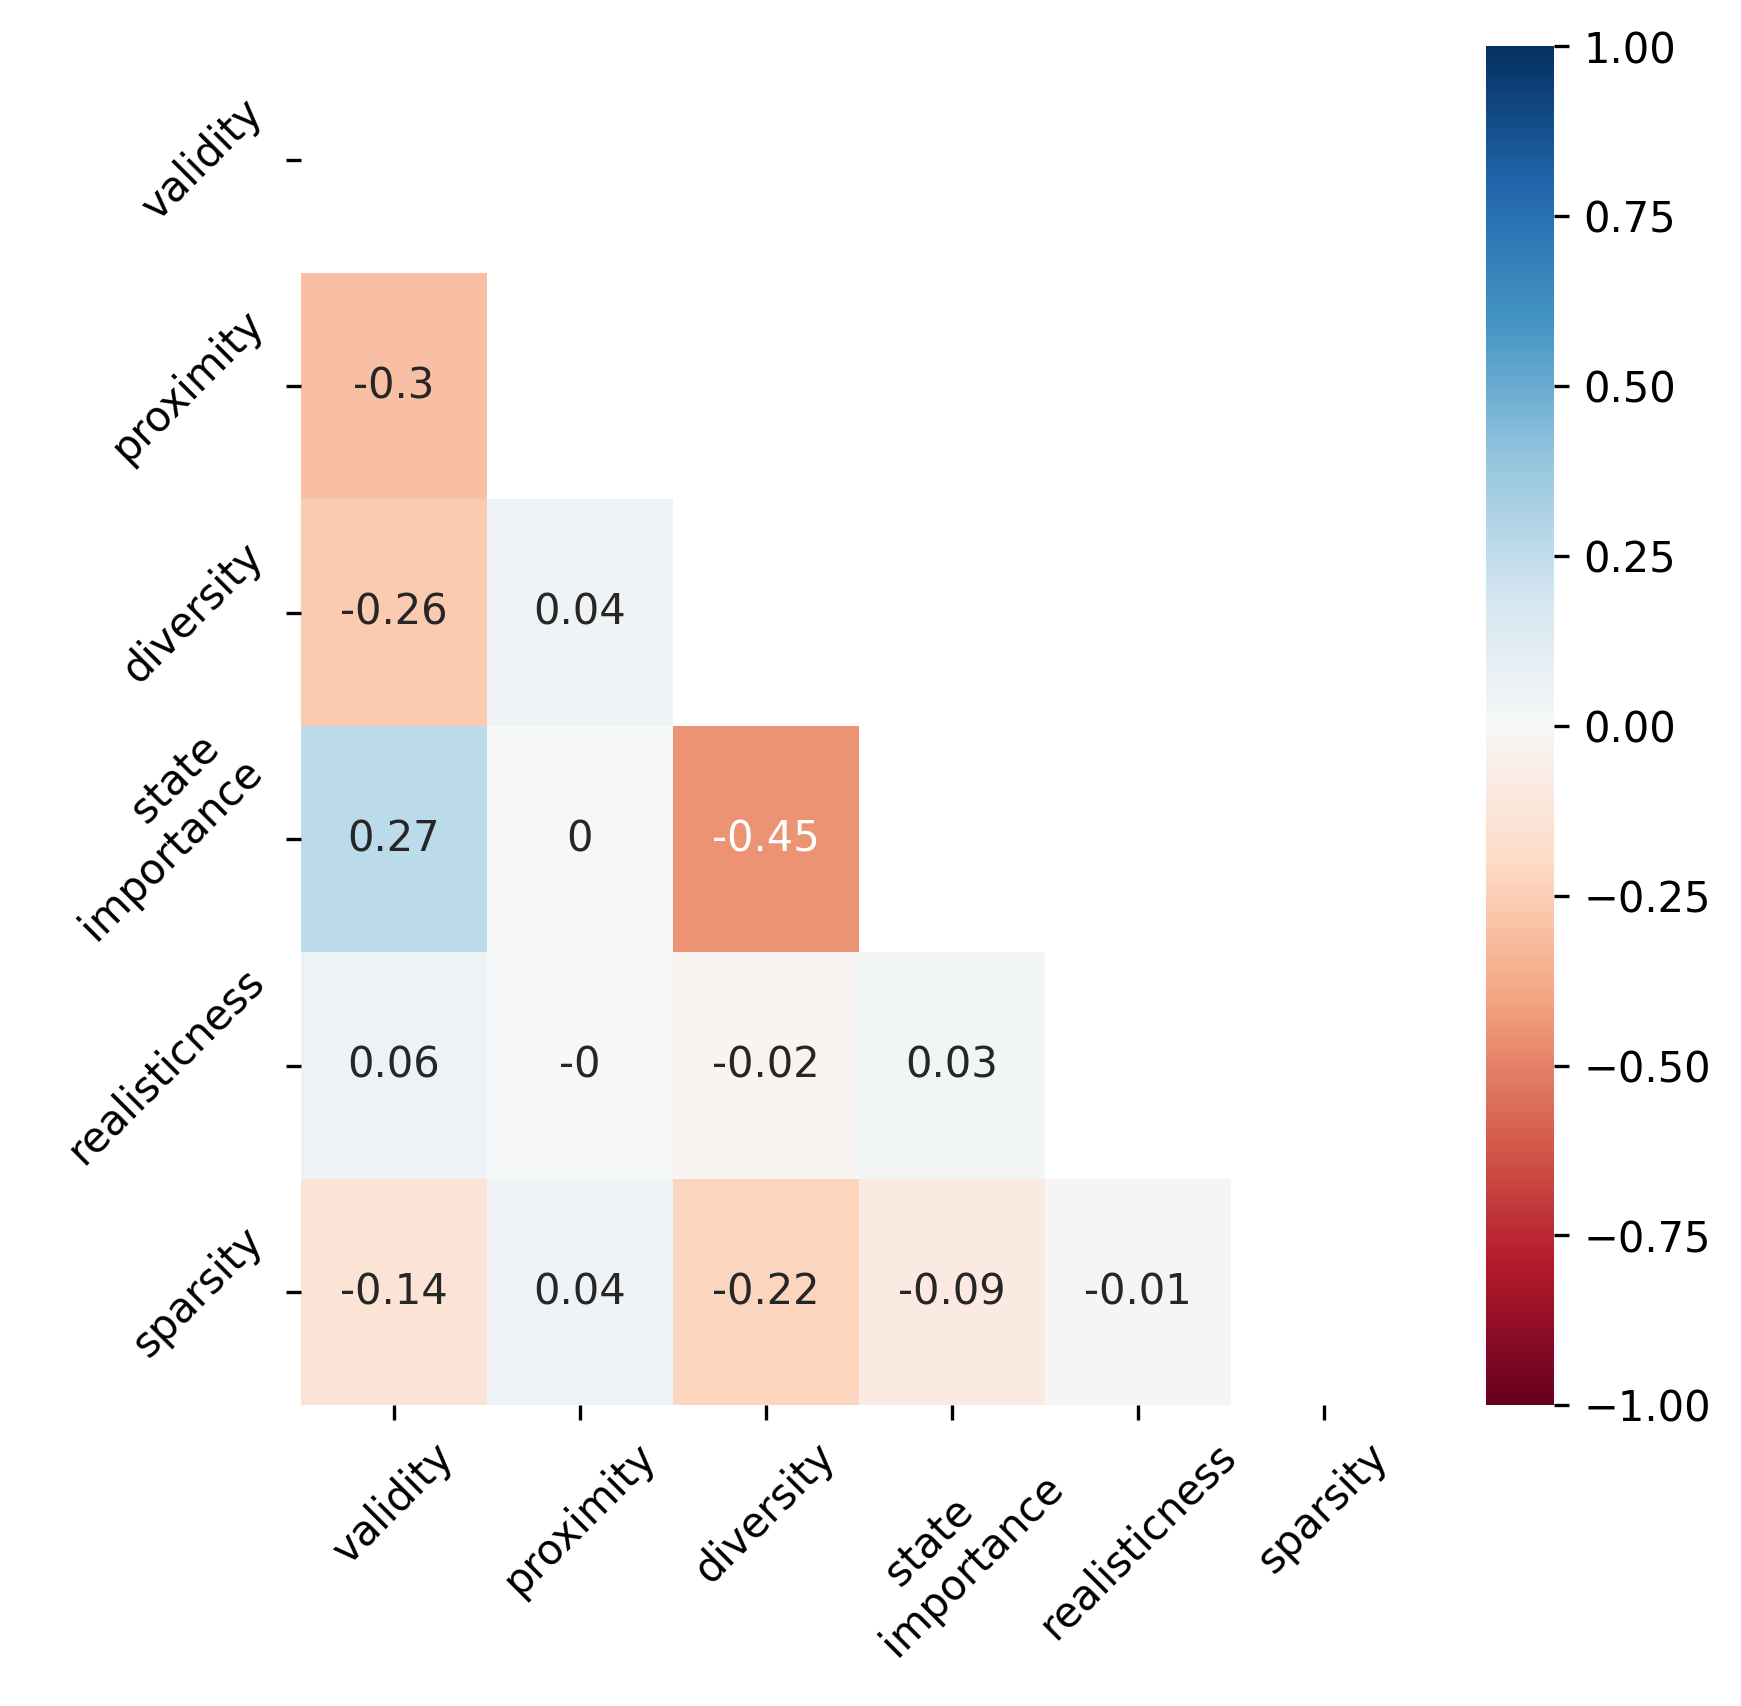

In [11]:
# staistics = {'spear_correlations': spear_correlations, 'pear_correlations': pear_correlations, 'perc_positions': perc_positions, 'chosen_values': chosen_values}
with open('..\..\datasets\\ablations_norm\\a_ending_prob0.15_num_deviations2_1000\statistics\qc_statistics.pkl', 'rb') as f:
    qc_stats = pkl.load(f)


corrs = []
for stat in qc_stats:
    corrs.append(stat['pear_correlations'])

# the columns and rows are qc, validity, proximity, diversity, critical_state, realisticness, sparsity

corr_matrix = np.ones((6,6))
# corr_matrix[0,1] = iterate_with_key(corrs, 'qc-validity')
# corr_matrix[1,0] = iterate_with_key(corrs, 'qc-validity')
# corr_matrix[0,2] = iterate_with_key(corrs, 'qc-proximity')
# corr_matrix[2,0] = iterate_with_key(corrs, 'qc-proximity')
# corr_matrix[0,3] = iterate_with_key(corrs, 'qc-diversity')
# corr_matrix[3,0] = iterate_with_key(corrs, 'qc-diversity')
# corr_matrix[0,4] = iterate_with_key(corrs, 'qc-critical_state')
# corr_matrix[4,0] = iterate_with_key(corrs, 'qc-critical_state')
# corr_matrix[0,5] = iterate_with_key(corrs, 'qc-realisticness')
# corr_matrix[5,0] = iterate_with_key(corrs, 'qc-realisticness')
# corr_matrix[0,6] = iterate_with_key(corrs, 'qc-sparsity')
# corr_matrix[6,0] = iterate_with_key(corrs, 'qc-sparsity')
corr_matrix[0,1] = round(iterate_with_key(corrs, 'validity-proximity'),2)
corr_matrix[1,0] = round(iterate_with_key(corrs, 'validity-proximity'),2)
corr_matrix[0,2] = round(iterate_with_key(corrs, 'validity-diversity'),2)
corr_matrix[2,0] = round(iterate_with_key(corrs, 'validity-diversity'),2)
corr_matrix[0,3] = round(iterate_with_key(corrs, 'validity-critical_state'),2)
corr_matrix[3,0] = round(iterate_with_key(corrs, 'validity-critical_state'),2)
corr_matrix[0,4] = round(iterate_with_key(corrs, 'validity-realisticness'),2)
corr_matrix[4,0] = round(iterate_with_key(corrs, 'validity-realisticness'),2)
corr_matrix[0,5] = round(iterate_with_key(corrs, 'validity-sparsity'),2)
corr_matrix[5,0] = round(iterate_with_key(corrs, 'validity-sparsity'),2)
corr_matrix[1,2] = round(iterate_with_key(corrs, 'proximity-diversity'),2)
corr_matrix[2,1] = round(iterate_with_key(corrs, 'proximity-diversity'),2)
corr_matrix[1,3] = round(iterate_with_key(corrs, 'proximity-critical_state'),2)
corr_matrix[3,1] = round(iterate_with_key(corrs, 'proximity-critical_state'),2)
corr_matrix[1,4] = round(iterate_with_key(corrs, 'proximity-realisticness'),2)
corr_matrix[4,1] = round(iterate_with_key(corrs, 'proximity-realisticness'),2)
corr_matrix[1,5] = round(iterate_with_key(corrs, 'proximity-sparsity'),2)
corr_matrix[5,1] = round(iterate_with_key(corrs, 'proximity-sparsity'),2)
corr_matrix[2,3] = round(iterate_with_key(corrs, 'critical_state-diversity'),2)
corr_matrix[3,2] = round(iterate_with_key(corrs, 'critical_state-diversity'),2)
corr_matrix[2,4] = round(iterate_with_key(corrs, 'diversity-realisticness'),2)
corr_matrix[4,2] = round(iterate_with_key(corrs, 'diversity-realisticness'),2)
corr_matrix[2,5] = round(iterate_with_key(corrs, 'diversity-sparsity'),2)
corr_matrix[5,2] = round(iterate_with_key(corrs, 'diversity-sparsity'),2)
corr_matrix[3,4] = round(iterate_with_key(corrs, 'critical_state-realisticness'),2)
corr_matrix[4,3] = round(iterate_with_key(corrs, 'critical_state-realisticness'),2)
corr_matrix[3,5] = round(iterate_with_key(corrs, 'critical_state-sparsity'),2)
corr_matrix[5,3] = round(iterate_with_key(corrs, 'critical_state-sparsity'),2)
corr_matrix[4,5] = round(iterate_with_key(corrs, 'realisticness-sparsity'),2)
corr_matrix[5,4] = round(iterate_with_key(corrs, 'realisticness-sparsity'),2)


df = pd.DataFrame(corr_matrix)
df.columns = ['validity', 'proximity', 'diversity', 'state \n importance', 'realisticness', 'sparsity']
df.index = ['validity', 'proximity', 'diversity', 'state \n importance', 'realisticness', 'sparsity']
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(6,6), dpi=300)
sns.heatmap(df, mask=mask, annot=True, cmap='RdBu', vmin=-1, vmax=1)
# plt.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False, )
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()


In [5]:
import sys
import os
from pathlib import Path
sys.path.append(os.path.join(os.getcwd(), '..', '..'))
import numpy as np
import torch
import matplotlib.pyplot as plt
import pickle as pkl
from tabulate import tabulate
from helpers.util_functions import normalise_value

from moral.ppo import PPO, TrajectoryDataset, update_policy
from envs.gym_wrapper import *
import random

from quality_metrics.validity_measures import validity_all as validity
from quality_metrics.validity_measures import validity_single, validity_single_partial
from quality_metrics.distance_measures import distance_all as distance
from quality_metrics.distance_measures import distance_single
from quality_metrics.diversity_measures import diversity_all as diversity
from quality_metrics.diversity_measures import diversity_single, distance_subtrajectories
from quality_metrics.critical_state_measures import critical_state_all as critical_state
from quality_metrics.critical_state_measures import critical_state_single
from quality_metrics.realisticness_measures import realisticness_all as realisticness
from quality_metrics.realisticness_measures import realisticness_single_partial
from quality_metrics.sparsity_measure import sparsity_all as sparsity
from quality_metrics.sparsity_measure import sparsitiy_single_partial

# pearson correlation
from scipy.stats import pearsonr, spearmanr

c:\Users\janwe\AppData\Local\Programs\Python\Python39\lib\site-packages\setuptools\distutils_patch.py:25: UserWarning: Distutils was imported before Setuptools. This usage is discouraged and may exhibit undesirable behaviors or errors. Please use Setuptools' objects directly or at least import Setuptools first.
  warnings.warn(


In [6]:
class config:
    env_id= 'randomized_v2'
    env_steps= 8e6
    batchsize_ppo= 12
    n_queries= 50
    preference_noise= 0
    n_workers= 1
    lr_ppo= 3e-4
    entropy_reg= 0.25
    gamma= 0.999
    epsilon= 0.1
    ppo_epochs= 5
    max_steps = 75
    base_path = '.\datasets\\100mstep\\'
    measure_statistics = True
    num_runs = 30
    criteria = ['validity', 'diversity', 'proximity', 'critical_state', 'realisticness', 'sparsity']
    # criteria = ['baseline']
    # criteria = ['validity']
    cf_method = 'mcts' # 'mcts' or 'step'

device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [7]:
# Load normalisation

with open('..\..\interpretability\\normalisation_values.pkl', 'rb') as f:
    normalisation = pkl.load(f)

weights = pkl.load(open('..\..\quality_metrics\\1000weights.pkl', 'rb'))

random.seed(4)
seed_env = random.randint(0, 100000)
torch.manual_seed(seed_env)
np.random.seed(seed_env)

# Create Environment
vec_env = VecEnv(config.env_id, config.n_workers, seed=seed_env)
states = vec_env.reset()
states_tensor = torch.tensor(states).float().to(device)

# Fetch Shapes
n_actions = vec_env.action_space.n
obs_shape = vec_env.observation_space.shape
state_shape = obs_shape[:-1]
in_channels = obs_shape[-1]

ppo = PPO(state_shape=state_shape, in_channels=in_channels, n_actions=n_actions).to(device)
ppo.load_state_dict(torch.load('..\..\saved_models/ppo_airl_v2_[1,10].pt', map_location=torch.device('cpu')))
# ppo.load_state_dict(torch.load('..\..\saved_models/ppo_airl_v2_[1,10]_new.pt', map_location=torch.device('cpu')))

<All keys matched successfully>

In [10]:
# calculate the quality criteria for all CTEs

with open('..\..\datasets\\ablations_norm\\a_ending_prob0.15_num_deviations2_1000\cf_trajectories.pkl', 'rb') as f:
    cf = pkl.load(f)
with open('..\..\datasets\\ablations_norm\\a_ending_prob0.15_num_deviations2_1000\org_trajectories.pkl', 'rb') as f:
    org = pkl.load(f)
with open('..\..\datasets\\ablations_norm\\a_ending_prob0.15_num_deviations2_1000\\statistics\start_points.pkl', 'rb') as f:
    starts = pkl.load(f)


ablation = 'a_num_deviations2'
vals, proxs, divs, crits, spars, reals, qcs = [], [], [], [], [], [], []
prev_org_trajs, prev_cf_trajs, prev_starts = [], [], []
for i in range(len(org)):
        weight = weights[i]
        val = validity_single_partial(org[i][0], cf[i][0])
        val = normalise_value(val, normalisation, 'validity') * weight['validity']
        vals.append(val)
        prox = distance_subtrajectories(org[i][0], cf[i][0])
        prox = normalise_value(prox, normalisation, 'proximity') * weight['proximity']
        proxs.append(prox)
        div = diversity_single(org[i][0], cf[i][0], starts[i], prev_org_trajs, prev_cf_trajs, prev_starts)
        div = normalise_value(div, normalisation, 'diversity') * weight['diversity']
        divs.append(div)
        crit = critical_state_single(ppo, org[i][0]['states'][0])
        crit = normalise_value(crit, normalisation, 'critical_state') * weight['critical_state']
        crits.append(crit)
        spar = sparsitiy_single_partial(org[i][0], cf[i][0])
        spar = normalise_value(spar, normalisation, 'sparsity') * weight['sparsity']
        spars.append(spar)
        real = realisticness_single_partial(org[i][0], cf[i][0])
        # if real > 10:
        #     org = org}[i][0]
        #     cf = cf}[i][0]
        #     a=0
        real = normalise_value(real, normalisation, 'realisticness') * weight['realisticness']
        reals.append(real)
        qc = val + prox + div + crit + spar + real
        qcs.append(qc)

        prev_org_trajs.append(org[i][0])
        prev_cf_trajs.append(cf[i][0])
        prev_starts.append(starts[i])

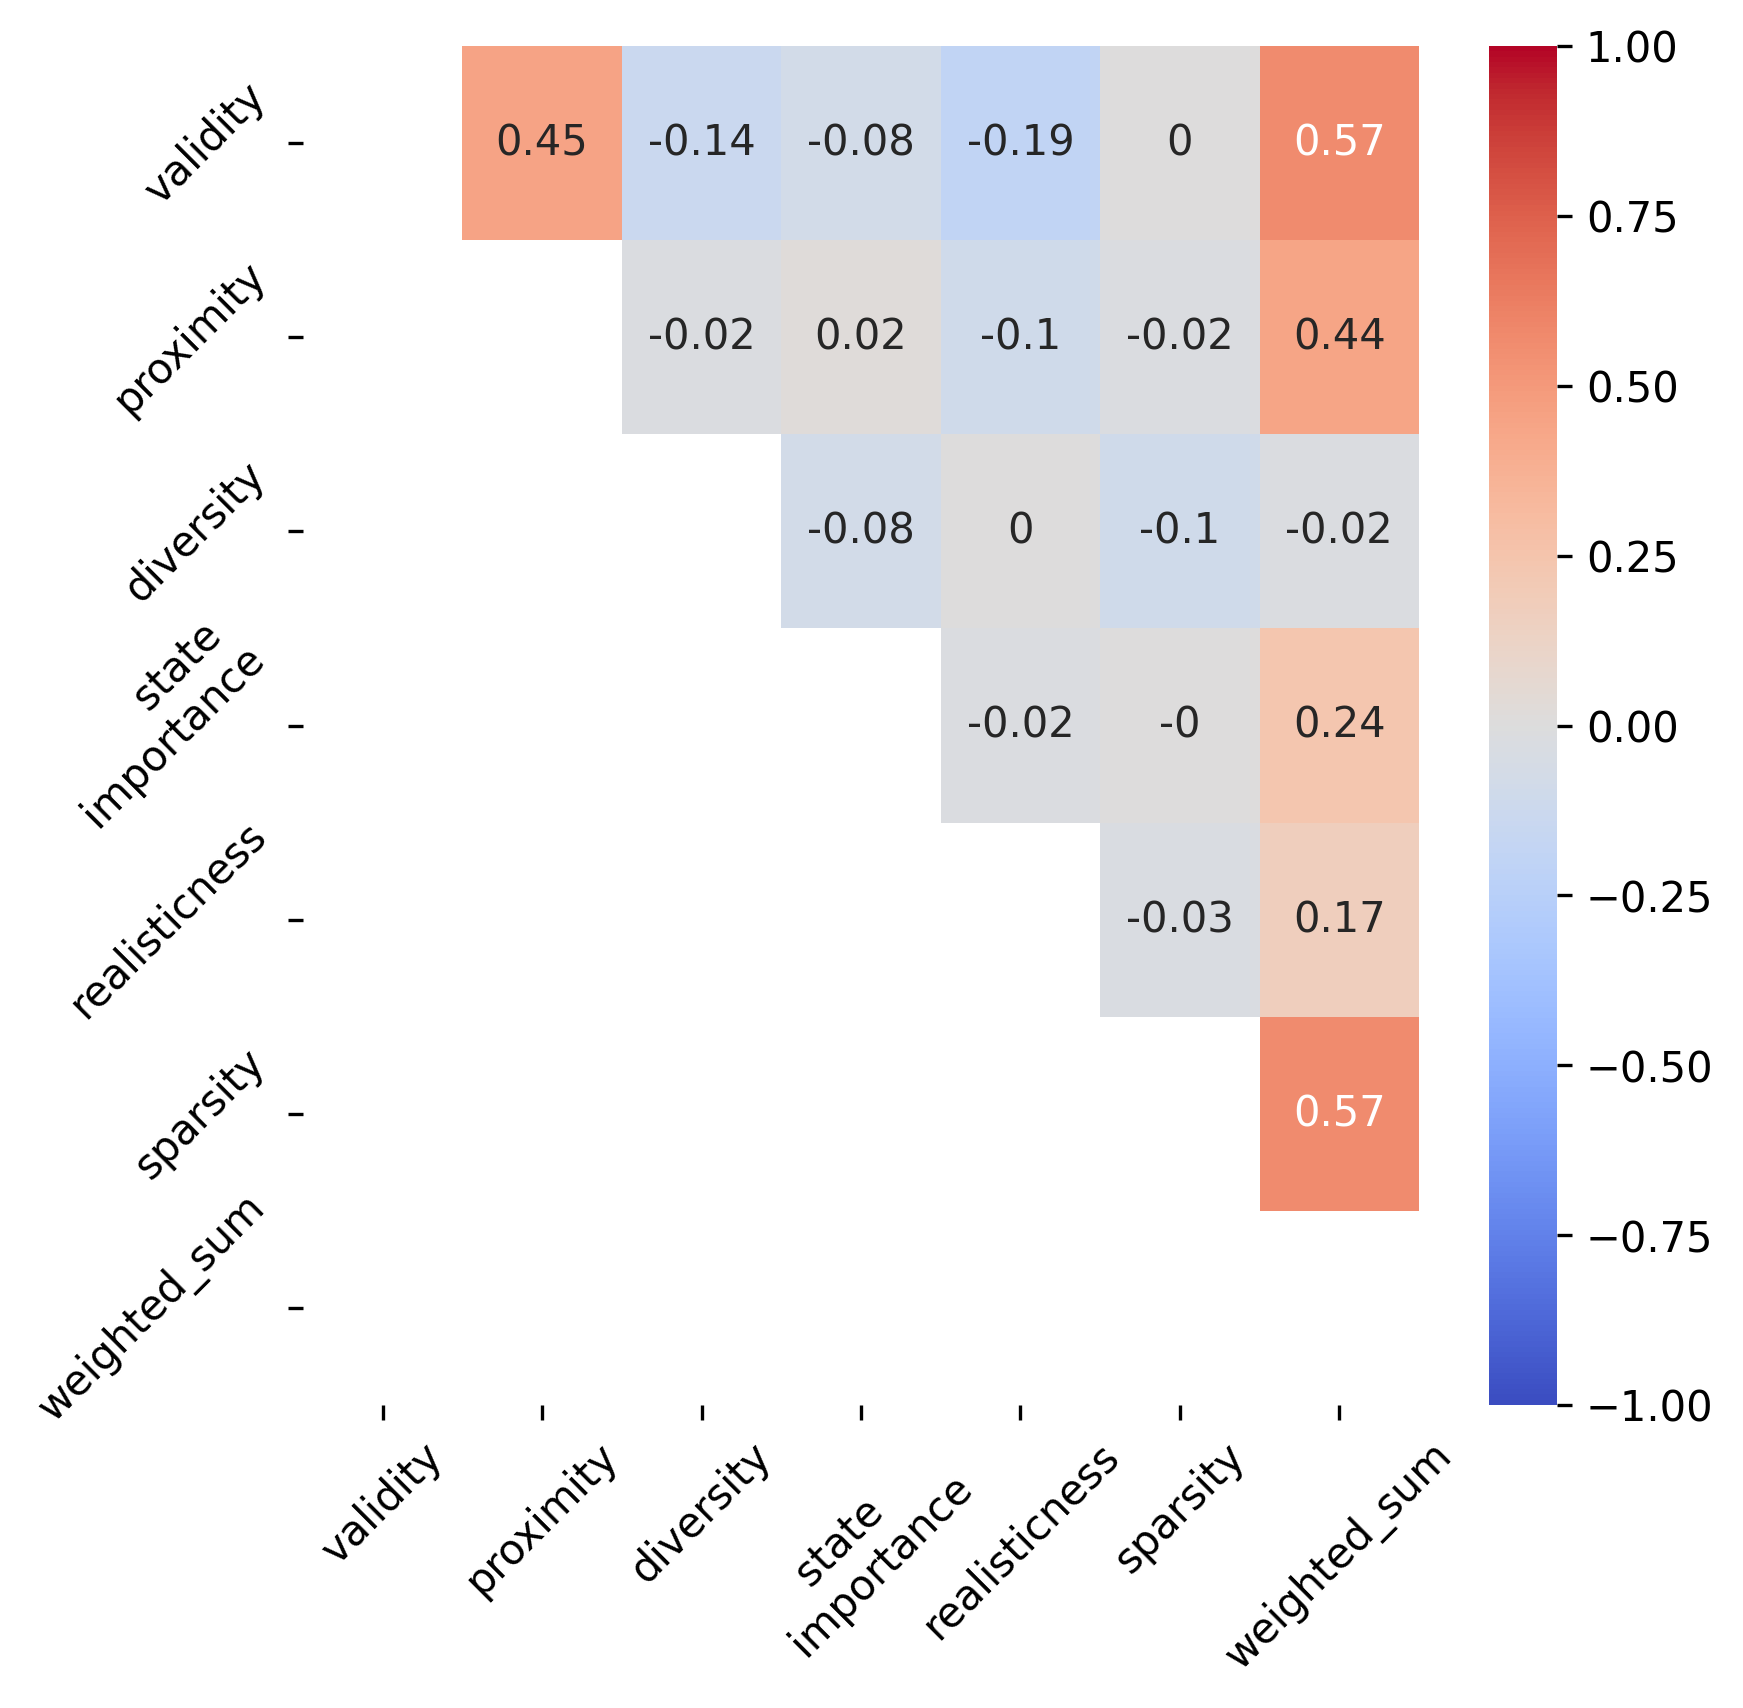

In [16]:
criteria = {0: vals, 1: proxs, 2: divs, 3: crits, 4: reals, 5: spars, 6: qcs}
corr_matrix = np.ones((7,7))
for i in range(7):
    for j in range(7):
        corr_matrix[i,j] = round(spearmanr(criteria[i], criteria[j])[0],2)


df = pd.DataFrame(corr_matrix)
df.columns = ['validity', 'proximity', 'diversity', 'state \n importance', 'realisticness', 'sparsity', 'weighted_sum']
df.index = ['validity', 'proximity', 'diversity', 'state \n importance', 'realisticness', 'sparsity', 'weighted_sum']
mask = np.tril(np.ones_like(corr_matrix, dtype=bool))
plt.figure(figsize=(6,6), dpi=300)
sns.heatmap(df, mask=mask, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
# plt.tick_params(top=True, bottom=False, labeltop=True, labelbottom=False, )
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

In [14]:
# Load the statistics
path_random = '..\..\datasets\\1000random\\1000\statistics' 
# random_efficiencies = pkl.load(open(path_random + "\effiencies.pkl", 'rb'))
# length_cf_random = pkl.load(open(path_random + "\lengths_cf.pkl", 'rb'))
# length_org_random = pkl.load(open(path_random + "\lengths_org.pkl", 'rb'))
start_points_random = pkl.load(open(path_random + "\start_points.pkl", 'rb'))

path_step = '..\..\datasets\\1000step\\1000\statistics'
step_efficiencies = pkl.load(open(path_step + "\effiencies.pkl", 'rb'))
length_cf_step = pkl.load(open(path_step + "\lengths_cf.pkl", 'rb'))
length_org_step = pkl.load(open(path_step + "\lengths_org.pkl", 'rb'))
start_points_step = pkl.load(open(path_step + "\start_points.pkl", 'rb'))

path_mcts = '..\..\datasets\\1000mcts\\1000\statistics'
mcts_efficiencies = pkl.load(open(path_mcts + "\effiencies.pkl", 'rb'))
length_cf_mcts = pkl.load(open(path_mcts + "\lengths_cf.pkl", 'rb'))
length_org_mcts = pkl.load(open(path_mcts + "\lengths_org.pkl", 'rb'))
start_points_mcts = pkl.load(open(path_mcts + "\start_points.pkl", 'rb'))

In [20]:
with open('..\..\datasets\\1000random\\1000\cf_trajectories.pkl', 'rb') as f:
    cf_trajectories_random = pkl.load(f)
with open('..\..\datasets\\1000random\\1000\org_trajectories.pkl', 'rb') as f:
    org_trajectories_random = pkl.load(f)

length_cf_randoms = []
length_org_randoms = []
for i in range(len(cf_trajectories_random)):
    length_cf_randoms.append(len(cf_trajectories_random[i][0]['states']))
    length_org_randoms.append(len(org_trajectories_random[i][0]['states']))

In [5]:
# weight = {'validity': 1, 'proximity': 1, 'critical_state': 0.5, 'diversity': 0.5, 'realisticness': 0.2, 'sparsity': 0.5}
# with open('..\..\interpretability\\normalisation_values_new.pkl', 'rb') as f:
#     normalisation = pkl.load(f)

# mcts_prox, step_prox, random_prox = [], [], []
# mcts_val, step_val, random_val = [], [], []
# mcts_div, step_div, random_div = [], [], []
# mcts_crit, step_crit, random_crit = [], [], []
# mcts_real, step_real, random_real = [], [], []
# mcts_spar, step_spar, random_spar = [], [], []
# mcts_qc, step_qc, random_qc = [], [], []

# with open('..\..\interpretability\logs\qc_comparison.txt', 'r') as f:
#     for line in f:
#         parts = line.split(' ')
#         if 'validity' in line:
#             mcts_val.append((float(parts[1]) - normalisation['validity'][0]) / normalisation['validity'][1] * weight['validity'])
#             step_val.append(float(parts[2])  - normalisation['validity'][0]) / normalisation['validity'][1] * weight['validity'])
#             random_val.append(float(parts[3])  - normalisation['validity'][0]) / normalisation['validity'][1] * weight['validity'])
#         elif 'diversity' in line:
#             mcts_div.append((float(parts[1]) -normalisation['diversity'][0]) / normalisation['diversity'][1] * weight['diversity'])
#             step_div.append((float(parts[2]) -normalisation['diversity'][0])/ normalisation['diversity'][1] * weight['diversity'])
#             random_div.append(float(parts[3]) -normalisation['diversity'][0])/ normalisation['diversity'][1] * weight['diversity'])
#         elif 'proximity' in line:
#             mcts_prox.append(- (float(parts[1]) -normalisation['diversity'][0])/ normalisation['proximity'][1] * weight['proximity'])
#             step_prox.append(-(float(parts[2]) -normalisation['diversity'][0])/ normalisation['proximity'][1] * weight['proximity'])
#             random_prox.append(-(float(parts[3]) -normalisation['diversity'][0])/ normalisation['proximity'][1] * weight['proximity'])
#         elif 'critical' in line:
#             mcts_crit.append((float(parts[1]) -normalisation['diversity'][0])/ normalisation['critical_state'][1] * weight['critical_state'])
#             step_crit.append((float(parts[2]) -normalisation['diversity'][0])/ normalisation['critical_state'][1] * weight['critical_state'])
#             random_crit.append((float(parts[3]) -normalisation['diversity'][0])/ normalisation['critical_state'][1] * weight['critical_state'])
#         elif 'realistic' in line:
#             mcts_real.append((float(parts[1])   / normalisation['realisticness'][1] * weight['realisticness'])
#             step_real.append((float(parts[2])   / normalisation['realisticness'][1] * weight['realisticness'])
#             random_real.append((float(parts[3]) / normalisation['realisticness'][1] * weight['realisticness'])
#         elif 'sparsity' in line:
#             mcts_spar.append((float(parts[1]) / normalisation['sparsity'][1] * weight['sparsity'])
#             step_spar.append((float(parts[2]) / normalisation['sparsity'][1] * weight['sparsity'])
#             random_spar.append((float(parts[3]) / normalisation['sparsity'][1] * weight['sparsity'])
# qc_mcts = [sum(x) for x in zip(mcts_prox, mcts_val, mcts_div, mcts_crit, mcts_real, mcts_spar)]
# qc_step = [sum(x) for x in zip(step_prox, step_val, step_div, step_crit, step_real, step_spar)]
# qc_random = [sum(x) for x in zip(random_prox, random_val, random_div, random_crit, random_real, random_spar)]

In [21]:
table = [
    ['statistics'] + ['mcts'] + ['step'] + ['random'],
    ['efficiency'] + [round(np.mean(mcts_efficiencies), 2)] + [round(np.mean(step_efficiencies), 2)] + [0.0],# [round(np.mean(random_efficiencies), 2)],
    ['length cf'] + [round(np.mean(length_cf_mcts), 2)] + [round(np.mean(length_cf_step), 2)] + [round(np.mean(length_cf_randoms), 2)],
    ['length org'] + [round(np.mean(length_org_mcts), 2)] + [round(np.mean(length_org_step), 2)] + [round(np.mean(length_org_randoms), 2)],
    ['start points'] + [round(np.mean(start_points_mcts), 2)] + [round(np.mean(start_points_step), 2)] + [round(np.mean(start_points_random), 2)],
    #  ['----------'] + ['----------'] + ['----------'] + ['----------'],
    # ['validity'] + [round(np.mean(mcts_val), 2)] + [round(np.mean(step_val), 2)] + [round(np.mean(random_val), 2)],
    # ['proximity'] + [round(np.mean(mcts_prox), 2)] + [round(np.mean(step_prox), 2)] + [round(np.mean(random_prox), 2)],
    # ['diversity'] + [round(np.mean(mcts_div), 2)] + [round(np.mean(step_div), 2)] + [round(np.mean(random_div), 2)],
    # ['critical'] + [round(np.mean(mcts_crit), 2)] + [round(np.mean(step_crit), 2)] + [round(np.mean(random_crit), 2)],
    # ['realistic'] + [round(np.mean(mcts_real), 2)] + [round(np.mean(step_real), 2)] + [round(np.mean(random_real), 2)],
    # ['sparsity'] + [round(np.mean(mcts_spar), 2)] + [round(np.mean(step_spar), 2)] + [round(np.mean(random_spar), 2)],
    # ['qc'] + [round(np.mean(qc_mcts), 2)] + [round(np.mean(qc_step), 2)] + [round(np.mean(qc_random), 2)]
]

print(tabulate(table, headers='firstrow'))
# print as latex table
print(tabulate(table, headers='firstrow', tablefmt='latex'))

statistics      mcts    step    random
------------  ------  ------  --------
efficiency     64.81   26.83      0
length cf       3.35   40.42      8
length org      3.35   40.35      8
start points   23.27   17.48     42.58
\begin{tabular}{lrrr}
\hline
 statistics   &   mcts &   step &   random \\
\hline
 efficiency   &  64.81 &  26.83 &     0    \\
 length cf    &   3.35 &  40.42 &     8    \\
 length org   &   3.35 &  40.35 &     8    \\
 start points &  23.27 &  17.48 &    42.58 \\
\hline
\end{tabular}


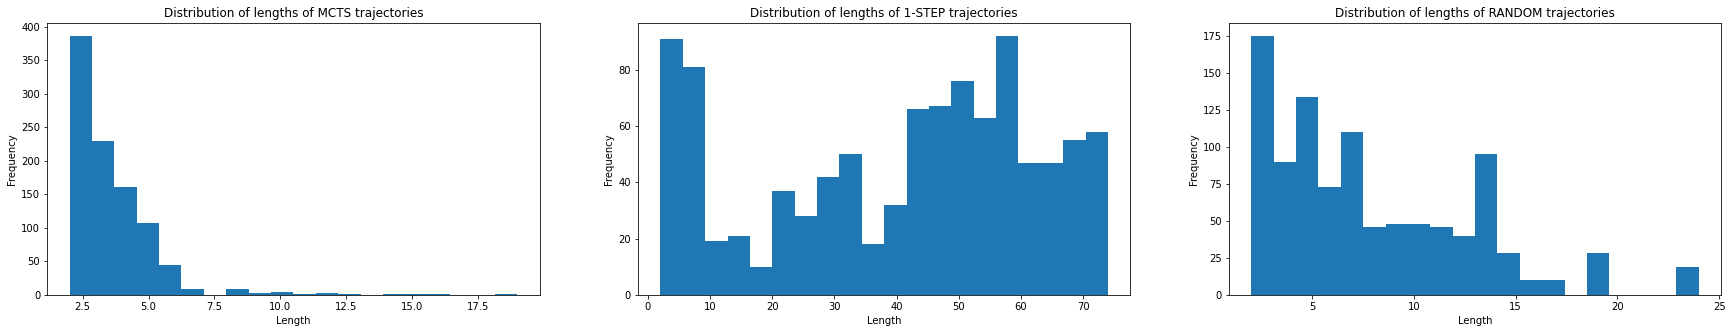

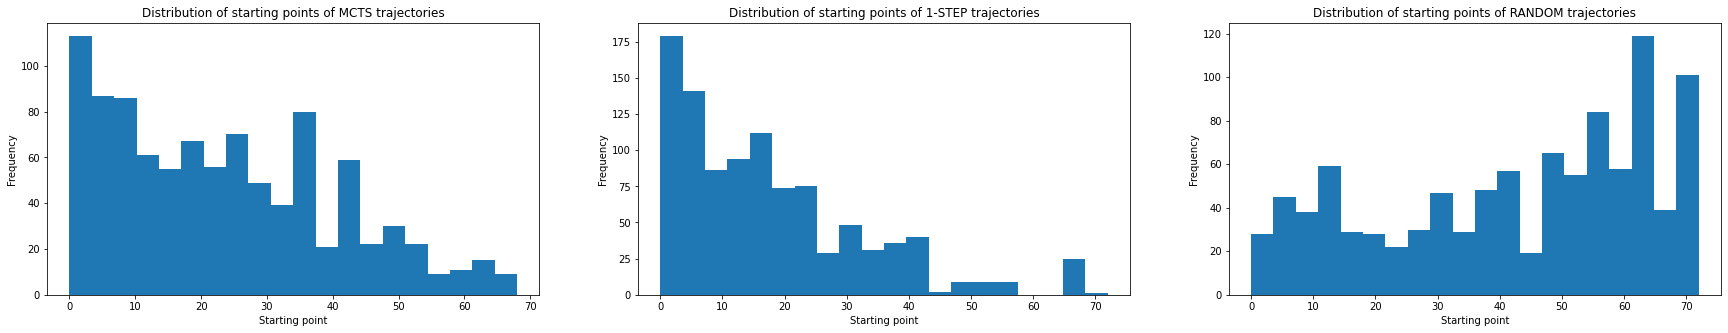

In [22]:
# display the distribution of lengths and starting points
# subplot
# set size of figure
plt.figure(figsize=(30, 5))
plt.subplot(1, 3, 1)

plt.hist(length_cf_mcts, bins=20)
plt.title('Distribution of lengths of MCTS trajectories')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(length_cf_step, bins=20)
plt.title('Distribution of lengths of 1-STEP trajectories')
plt.xlabel('Length')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(length_cf_randoms, bins=20)
plt.title('Distribution of lengths of RANDOM trajectories')
plt.xlabel('Length')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(30, 5))
plt.subplot(1, 3, 1)

plt.hist(start_points_mcts, bins=20)
plt.title('Distribution of starting points of MCTS trajectories')
plt.xlabel('Starting point')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(start_points_step, bins=20)
plt.title('Distribution of starting points of 1-STEP trajectories')
plt.xlabel('Starting point')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(start_points_random, bins=20)
plt.title('Distribution of starting points of RANDOM trajectories')
plt.xlabel('Starting point')
plt.ylabel('Frequency')
plt.show()

NameError: name 'feat5_mcts' is not defined

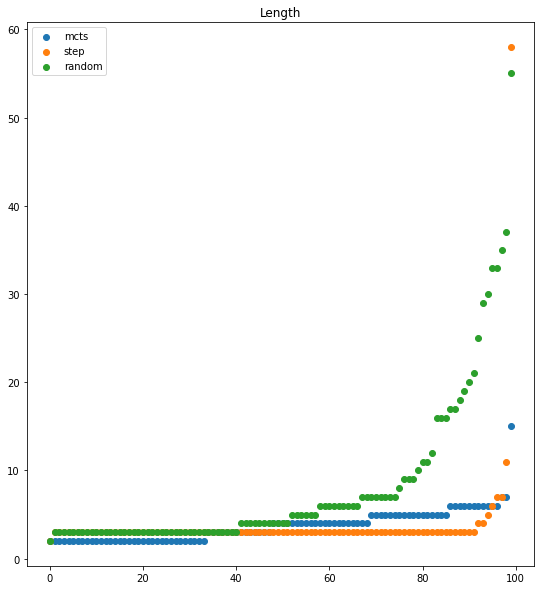

In [37]:
x = np.arange(100)

y_mcts_pre = sorted(length_cf_mcts[:100])
y_step_pre = sorted(length_cf_step[:100])
y_random_pre = sorted(length_cf_randoms[:100])
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.scatter(x, y_mcts_pre, label='mcts')
plt.scatter(x, y_step_pre, label='step')
plt.scatter(x, y_random_pre, label='random')
plt.title('Length')
plt.legend()

y_mcts = sorted(feat5_mcts[:100])
y_step = sorted(feat5_step[:100])
y_random = sorted(feat5_random[:100])
plt.subplot(1,2,2)
plt.scatter(x, y_mcts, label='mcts')
plt.scatter(x, y_step, label='step')
plt.scatter(x, y_random, label='random')
plt.title('Length after normalising')
plt.legend()

plt.show()

### Observations

MCTS is by far the slowest. This makes sense, because it considers many more options.

MCTS makes much shorter trajectories (basically always minimum length). This indicates 
- that diversity is not properly optimised for
- the quality criteria are not traded-off well against each other

The length of MCTS org and cf trajectories are the same (this is built into the method), while step and random have different lengths.
- These are differences in when I decide to end the trajectories. A good ablation would make try to reduce these effect by e.g. ending originals of step at the same timestep as the cf

For step the trajectories in the counterfactual are longer than the originals. Maybe this is built in to the method? But I think it's more likely the byproduct of some quality criteria incentivising this difference in lengths.

MCTS starts slightly later than step. Random starts much later because it has uniformly distributed starting points.

### Quality Criteria


# Analysing quality criterias

I will visualize the distribution of quality criteria

Text(0.5, 1.0, 'Quality Criteria Random')

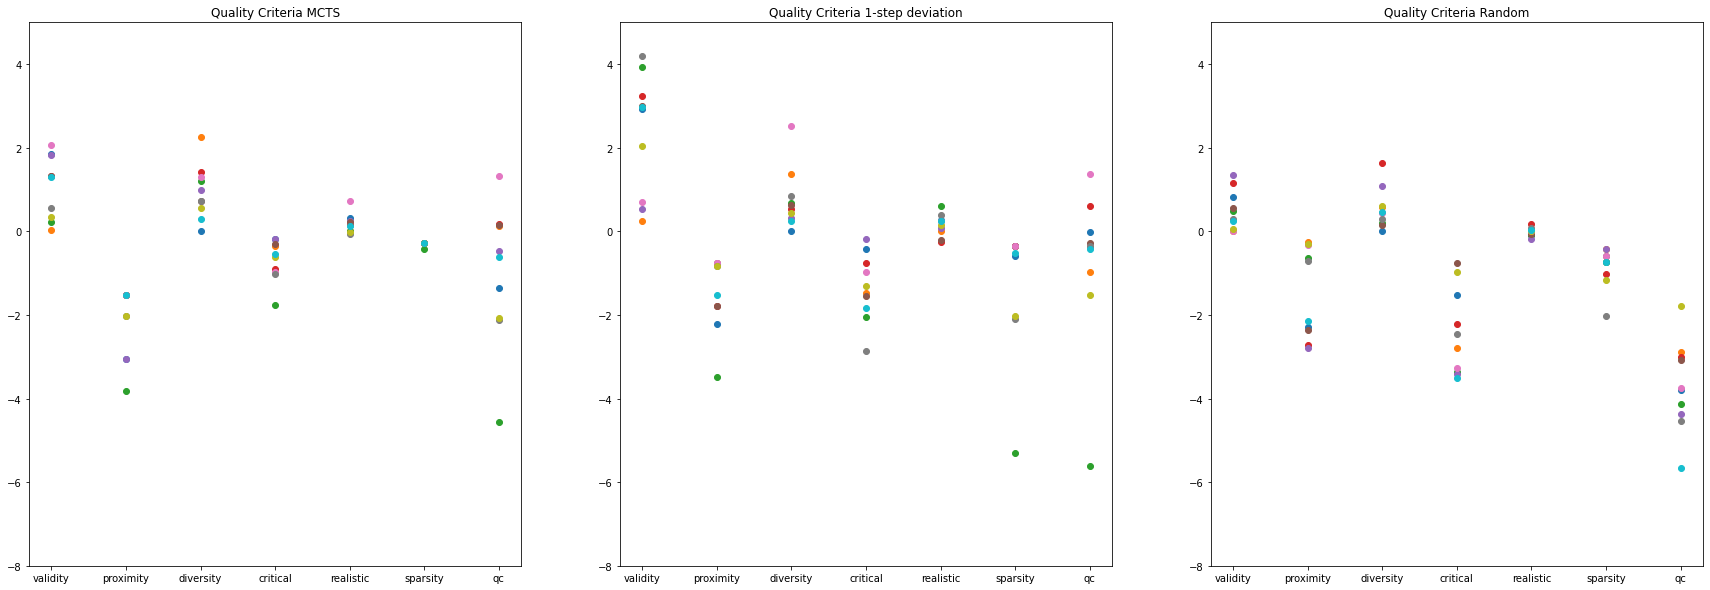

In [7]:
number_of_points = 10

zipped_mcts = [(mcts_val[i], mcts_prox[i], mcts_div[i], mcts_crit[i], mcts_real[i], mcts_spar[i], qc_mcts[i]) for i in range(number_of_points)]
zipped_step = [(step_val[i], step_prox[i], step_div[i], step_crit[i], step_real[i], step_spar[i], qc_step[i]) for i in range(number_of_points)]
zipped_random = [(random_val[i], random_prox[i], random_div[i], random_crit[i], random_real[i], random_spar[i], qc_random[i]) for i in range(number_of_points)]

plt.figure(figsize=(30, 10))
plt.subplot(1,3,1)
# set range of y-axis to [-8, 5]
plt.ylim(-8, 5)
for i in range(number_of_points):
    plt.scatter(['validity', 'proximity', 'diversity', 'critical', 'realistic', 'sparsity', 'qc'], zipped_mcts[i])
plt.title('Quality Criteria MCTS')

plt.subplot(1,3,2)
plt.ylim(-8, 5)
for i in range(number_of_points):
    plt.scatter(['validity', 'proximity', 'diversity', 'critical', 'realistic', 'sparsity', 'qc'], zipped_step[i])
plt.title('Quality Criteria 1-step deviation')


plt.subplot(1,3,3)
plt.ylim(-8, 5)
for i in range(number_of_points):
    plt.scatter(['validity', 'proximity', 'diversity', 'critical', 'realistic', 'sparsity', 'qc'], zipped_random[i])
plt.title('Quality Criteria Random')


In [8]:
# print the average and standard deviation of the statistics
table = [
    ['statistics'] + ['mcts mean'] + ['mcts std'] + ['step mean'] + ['step std'] + ['random mean'] + ['random std'],
    ['validity'] + [round(np.mean(mcts_val), 2), round(np.std(mcts_val), 2)] + [round(np.mean(step_val), 2), round(np.std(step_val), 2)] + [round(np.mean(random_val), 2), round(np.std(random_val), 2)],
    ['proximity'] + [round(np.mean(mcts_prox), 2), round(np.std(mcts_prox), 2)] + [round(np.mean(step_prox), 2), round(np.std(step_prox), 2)] + [round(np.mean(random_prox), 2), round(np.std(random_prox), 2)],
    ['diversity'] + [round(np.mean(mcts_div), 2), round(np.std(mcts_div), 2)] + [round(np.mean(step_div), 2), round(np.std(step_div), 2)] + [round(np.mean(random_div), 2), round(np.std(random_div), 2)],
    ['critical'] + [round(np.mean(mcts_crit), 2), round(np.std(mcts_crit), 2)] + [round(np.mean(step_crit), 2), round(np.std(step_crit), 2)] + [round(np.mean(random_crit), 2), round(np.std(random_crit), 2)],
    ['realistic'] + [round(np.mean(mcts_real), 2), round(np.std(mcts_real), 2)] + [round(np.mean(step_real), 2), round(np.std(step_real), 2)] + [round(np.mean(random_real), 2), round(np.std(random_real), 2)],
    ['sparsity'] + [round(np.mean(mcts_spar), 2), round(np.std(mcts_spar), 2)] + [round(np.mean(step_spar), 2), round(np.std(step_spar), 2)] + [round(np.mean(random_spar), 2), round(np.std(random_spar), 2)],
    ['qc'] + [round(np.mean(qc_mcts), 2), round(np.std(qc_mcts), 2)] + [round(np.mean(qc_step), 2), round(np.std(qc_step), 2)] + [round(np.mean(qc_random), 2), round(np.std(qc_random), 2)]
]

print(tabulate(table, headers='firstrow'))
# index of the highest qc_step
print(qc_step.index(max(qc_step)))
print(max(qc_step), min(qc_step))
print(max(qc_mcts), min(qc_mcts))
print(max(qc_random), min(qc_random))


statistics      mcts mean    mcts std    step mean    step std    random mean    random std
------------  -----------  ----------  -----------  ----------  -------------  ------------
validity             1.25        0.96         2.3         1.47           0.8           0.87
proximity           -1.79        0.48        -1.5         0.88          -1.48          1.09
diversity            0.39        0.29         0.45        0.51           0.59          0.5
critical            -0.71        0.44        -1.19        0.9           -2.53          0.93
realistic            0.1         0.26         0.27        0.49           0.06          0.35
sparsity            -0.29        0.01        -1.41        1.82          -1.27          0.78
qc                  -1.05        1.49        -1.08        1.8           -3.83          1.7
39
2.4990973803317194 -8.571911645527301
2.8838986128353876 -4.563430289458793
-0.05796851335157149 -9.279113969438772


### Observations
Step has a higher significantly variance in it's quality criteria than MCTS.

**Proximity** Both mcts and step don't do a great job at optimising for proximity. They are both worse than the random trajectories.

MCTS does worst at diversity and best and critical. This makes sense since they are built into the method.

Overall MCTS slightly outperforms Step, but at the cost of 10x computational time.



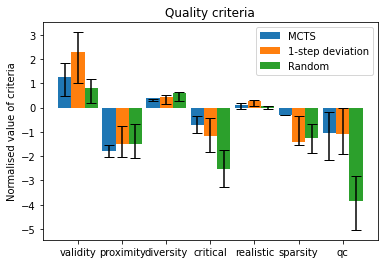

In [11]:
# Plot the quality criteria

criteria = ['validity', 'proximity', 'diversity', 'critical', 'realistic', 'sparsity', 'qc']

mcts_means = [np.mean(mcts_val), np.mean(mcts_prox), np.mean(mcts_div), np.mean(mcts_crit), np.mean(mcts_real), np.mean(mcts_spar), np.mean(qc_mcts)]
mcts_upper = [np.percentile(mcts_val, 75), np.percentile(mcts_prox, 75), np.percentile(mcts_div, 75), np.percentile(mcts_crit, 75), np.percentile(mcts_real, 75), np.percentile(mcts_spar, 75), np.percentile(qc_mcts, 75)]
mcts_lower = [np.percentile(mcts_val, 25), np.percentile(mcts_prox, 25), np.percentile(mcts_div, 25), np.percentile(mcts_crit, 25), np.percentile(mcts_real, 25), np.percentile(mcts_spar, 25), np.percentile(qc_mcts, 25)]

step_means = [np.mean(step_val), np.mean(step_prox), np.mean(step_div), np.mean(step_crit), np.mean(step_real), np.mean(step_spar), np.mean(qc_step)]
step_upper = [np.percentile(step_val, 75), np.percentile(step_prox, 75), np.percentile(step_div, 75), np.percentile(step_crit, 75), np.percentile(step_real, 75), np.percentile(step_spar, 75), np.percentile(qc_step, 75)]
step_lower = [np.percentile(step_val, 25), np.percentile(step_prox, 25), np.percentile(step_div, 25), np.percentile(step_crit, 25), np.percentile(step_real, 25), np.percentile(step_spar, 25), np.percentile(qc_step, 25)]

random_means = [np.mean(random_val), np.mean(random_prox), np.mean(random_div), np.mean(random_crit), np.mean(random_real), np.mean(random_spar), np.mean(qc_random)]
random_upper = [np.percentile(random_val, 75), np.percentile(random_prox, 75), np.percentile(random_div, 75), np.percentile(random_crit, 75), np.percentile(random_real, 75), np.percentile(random_spar, 75), np.percentile(qc_random, 75)]
random_lower = [np.percentile(random_val, 25), np.percentile(random_prox, 25), np.percentile(random_div, 25), np.percentile(random_crit, 25), np.percentile(random_real, 25), np.percentile(random_spar, 25), np.percentile(qc_random, 25)]

fig, ax = plt.subplots()
x = np.arange(len(criteria))
width = 0.3

rects1 = ax.bar(x - width, mcts_means, width, label='MCTS', yerr=[np.subtract(mcts_means, mcts_lower), np.subtract(mcts_upper, mcts_means)], capsize=5)
rects2 = ax.bar(x, step_means, width, label='1-step deviation', yerr=[np.subtract(step_means, step_lower), np.subtract(step_upper, step_means)], capsize=5)
rects3 = ax.bar(x + width, random_means, width, label='Random', yerr=[np.subtract(random_means, random_lower), np.subtract(random_upper, random_means)], capsize=5)

ax.set_ylabel('Normalised value of criteria')
ax.set_title('Quality criteria')
ax.set_xticks(x)
ax.set_xticklabels(criteria)
ax.legend()

# plt.errorbar(x, mcts_means, yerr=[np.subtract(mcts_means, mcts_lower), np.subtract(mcts_upper, mcts_means)], fmt='none', ecolor='black', capsize=5)
# plt.errorbar(x, step_means, yerr=[np.subtract(step_means, step_lower), np.subtract(step_upper, step_means)], fmt='none', ecolor='black', capsize=5)
# plt.errorbar(x, random_means, yerr=[np.subtract(random_means, random_lower), np.subtract(random_upper, random_means)], fmt='none', ecolor='black', capsize=5)

plt.show()



In [14]:
table = [
    ['criteria'] + ['validity'] + ['proximity'] + ['diversity'] + ['critical'] + ['realistic'] + ['sparsity'] + ['qc'],
    ['validity'] + [1] + [round(pearsonr(mcts_val, mcts_prox)[0],2)] + [round(pearsonr(mcts_val, mcts_div)[0],2)] + [round(pearsonr(mcts_val, mcts_crit)[0],2)] + [round(pearsonr(mcts_val, mcts_real)[0],2)] + [round(pearsonr(mcts_val, mcts_spar)[0],2)] + [round(pearsonr(mcts_val, qc_mcts)[0],2)],
    ['proximity'] + [round(pearsonr(mcts_prox, mcts_val)[0],2)] + [1] + [round(pearsonr(mcts_prox, mcts_div)[0],2)] + [round(pearsonr(mcts_prox, mcts_crit)[0],2)] + [round(pearsonr(mcts_prox, mcts_real)[0],2)] + [round(pearsonr(mcts_prox, mcts_spar)[0],2)] + [round(pearsonr(mcts_prox, qc_mcts)[0],2)],
    ['diversity'] + [round(pearsonr(mcts_div, mcts_val)[0],2)] + [round(pearsonr(mcts_div, mcts_prox)[0],2)] + [1] + [round(pearsonr(mcts_div, mcts_crit)[0],2)] + [round(pearsonr(mcts_div, mcts_real)[0],2)] + [round(pearsonr(mcts_div, mcts_spar)[0],2)] + [round(pearsonr(mcts_div, qc_mcts)[0],2)],
    ['critical'] + [round(pearsonr(mcts_crit, mcts_val)[0],2)] + [round(pearsonr(mcts_crit, mcts_prox)[0],2)] + [round(pearsonr(mcts_crit, mcts_div)[0],2)] + [1] + [round(pearsonr(mcts_crit, mcts_real)[0],2)] + [round(pearsonr(mcts_crit, mcts_spar)[0],2)] + [round(pearsonr(mcts_crit, qc_mcts)[0],2)],
    ['realistic'] + [round(pearsonr(mcts_real, mcts_val)[0],2)] + [round(pearsonr(mcts_real, mcts_prox)[0],2)] + [round(pearsonr(mcts_real, mcts_div)[0],2)] + [round(pearsonr(mcts_real, mcts_crit)[0],2)] + [1] + [round(pearsonr(mcts_real, mcts_spar)[0],2)] + [round(pearsonr(mcts_real, qc_mcts)[0],2)],
    ['sparsity'] + [round(pearsonr(mcts_spar, mcts_val)[0],2)] + [round(pearsonr(mcts_spar, mcts_prox)[0],2)] + [round(pearsonr(mcts_spar, mcts_div)[0],2)] + [round(pearsonr(mcts_spar, mcts_crit)[0],2)] + [round(pearsonr(mcts_spar, mcts_real)[0],2)] + [1] + [round(pearsonr(mcts_spar, qc_mcts)[0],2)],
    ['qc'] + [round(pearsonr(qc_mcts, mcts_val)[0],2)] + [round(pearsonr(qc_mcts, mcts_prox)[0],2)] + [round(pearsonr(qc_mcts, mcts_div)[0],2)] + [round(pearsonr(qc_mcts, mcts_crit)[0],2)] + [round(pearsonr(qc_mcts, mcts_real)[0],2)] + [round(pearsonr(qc_mcts, mcts_spar)[0],2)] + [1] 
]

# print as latex table
print(tabulate(table, headers='firstrow', tablefmt='latex'))
print(tabulate(table, headers='firstrow'))

\begin{tabular}{lrrrrrrr}
\hline
 criteria   &   validity &   proximity &   diversity &   critical &   realistic &   sparsity &   qc \\
\hline
 validity   &       1    &        0.15 &       -0.08 &       0.18 &        0.59 &       0.11 & 0.83 \\
 proximity  &       0.15 &        1    &       -0.02 &       0.19 &        0.26 &       0.42 & 0.52 \\
 diversity  &      -0.08 &       -0.02 &        1    &      -0.03 &        0.09 &      -0.28 & 0.14 \\
 critical   &       0.18 &        0.19 &       -0.03 &       1    &        0.17 &       0.24 & 0.5  \\
 realistic  &       0.59 &        0.26 &        0.09 &       0.17 &        1    &       0.03 & 0.71 \\
 sparsity   &       0.11 &        0.42 &       -0.28 &       0.24 &        0.03 &       1    & 0.24 \\
 qc         &       0.83 &        0.52 &        0.14 &       0.5  &        0.71 &       0.24 & 1    \\
\hline
\end{tabular}
criteria      validity    proximity    diversity    critical    realistic    sparsity    qc
----------  ---------- 